## Loan Repayment Predictor

The dataset is a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

**Objective**

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

## Data Overview

----
-----
Information on the data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

**Initial imports**

In [314]:
import numpy as np
import pandas as pd 

# visualistion libraries
import seaborn as sns 
import matplotlib.pyplot as plt

%matplotlib inline

**First, reading the info file**

In [315]:
data_info = pd.read_csv('lending_club_info.csv', index_col = 'LoanStatNew') 

# contains the info on all columns of the data as shown in the data overview section

**Creating a function for easier acess later on**

In [316]:
def col_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [317]:
col_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


**Reading the dataset**

In [318]:
data = pd.read_csv('lending_club_loan_two.csv')
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [320]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


## Section 1: Exploratory Data Analysis

**First let's check if the data is balanced**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

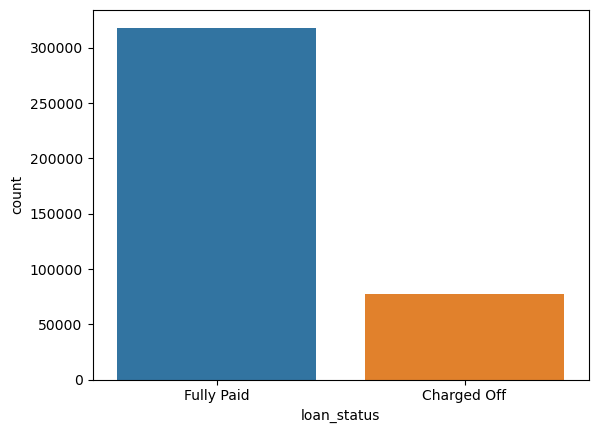

In [321]:
# make a countplot of loan_status

sns.countplot(x = 'loan_status', data = data)

**Seeing the correaltion between the numeric values using .corr()**

<AxesSubplot:>

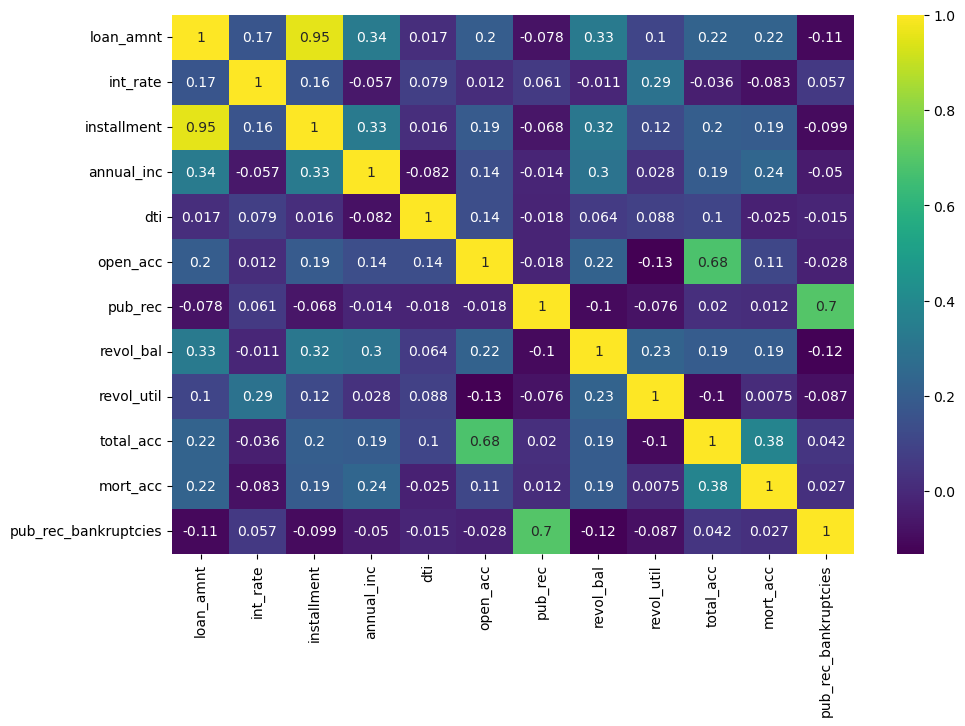

In [322]:
plt.figure(figsize = (11,7))
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

**Since there is almost perfect corelation between loan amount and installments, exploring those features furthur**

In [323]:
col_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [324]:
col_info('installment')

The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='loan_amnt', ylabel='installment'>

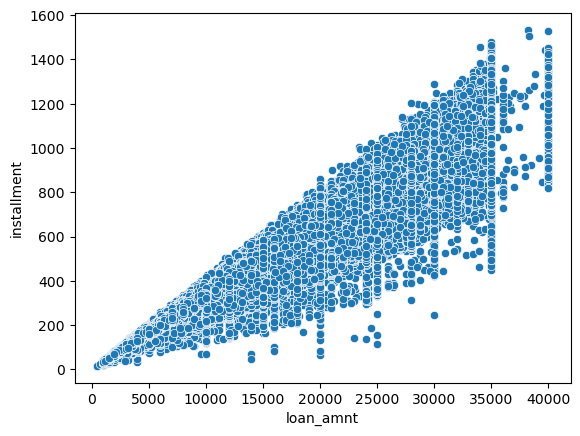

In [325]:
sns.scatterplot(x = 'loan_amnt', y  = 'installment', data = data)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

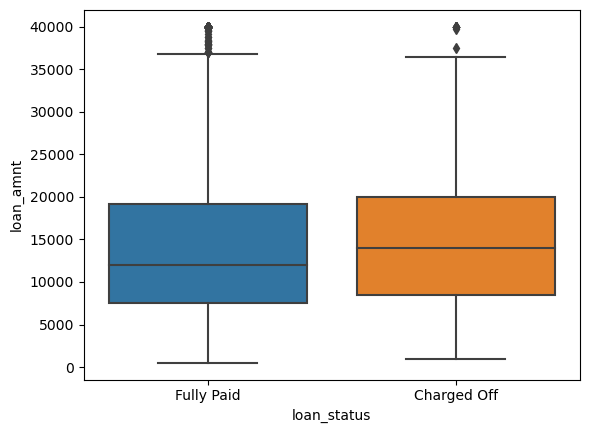

In [326]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = data)

In [327]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Exploring the Grade and SubGrade columns**

In [328]:
sorted(data['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [329]:
sorted(data['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='grade', ylabel='count'>

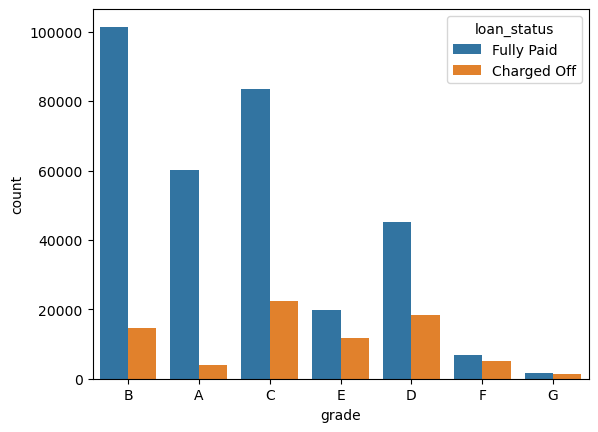

In [330]:
sns.countplot(x = 'grade',data = data, hue = 'loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

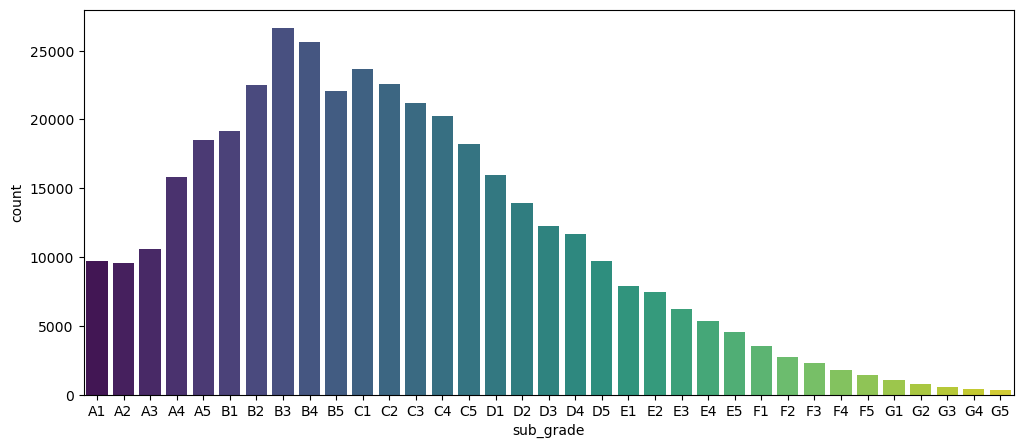

In [331]:
# resizing 
plt.figure(figsize = (12, 5))

# storing subgrades in order to plot as per the order
subgrade_order = sorted(data['sub_grade'].unique())

# countplot
sns.countplot(x = 'sub_grade', data = data, order = subgrade_order, palette = 'viridis')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

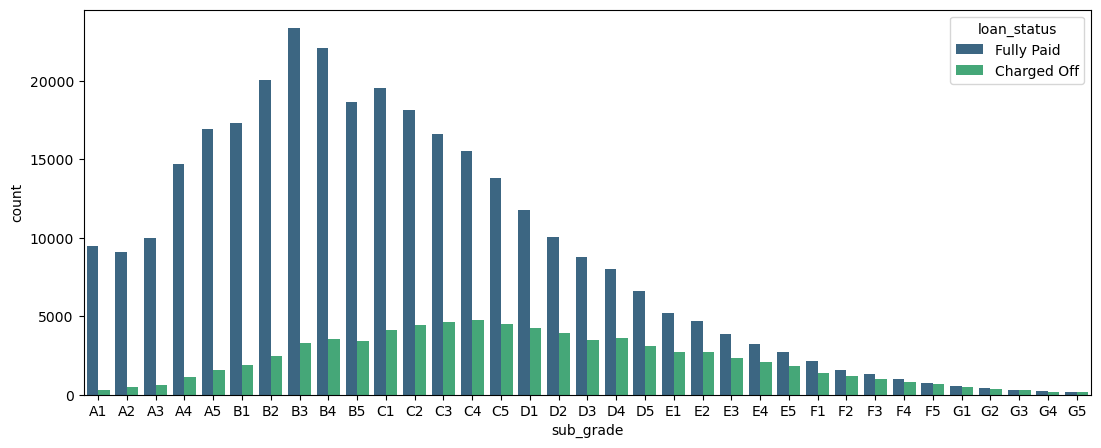

In [332]:
# resizing 
plt.figure(figsize = (13, 5))

# countplot
sns.countplot(x = 'sub_grade', data = data, order = subgrade_order, palette = 'viridis', hue = 'loan_status')

**Since F and G grades don't seem to be paid back, isolating them and exploring**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

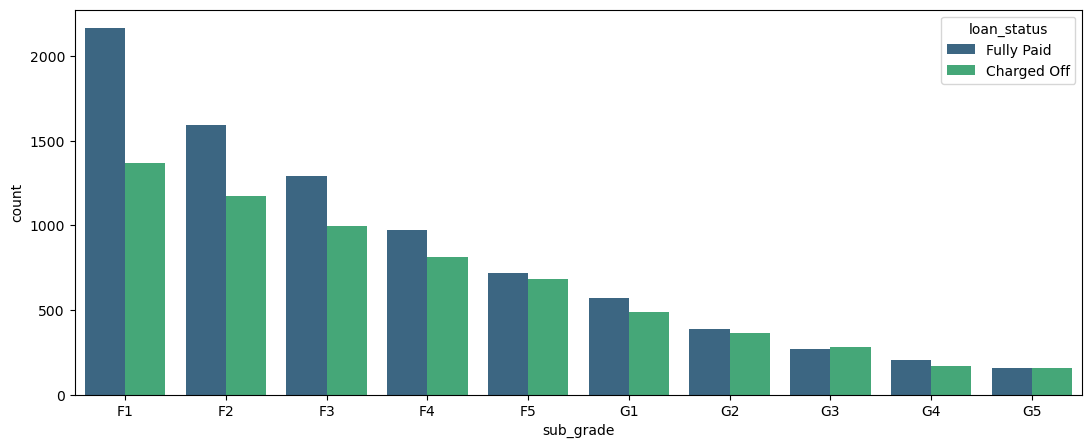

In [333]:
# isolating F and G grades
f_g = data[ (data['grade'] == 'F') | (data['grade'] == 'G')]

# resizing 
plt.figure(figsize = (13, 5))

# storing subgrade order for the plot
f_g_subgrade_order = sorted(f_g['sub_grade'].unique())

# countplot
sns.countplot(x = 'sub_grade', data = f_g, order = f_g_subgrade_order, hue = 'loan_status', palette = 'viridis')

**Converting the label column (loan status) into numeric values for classification**

In [334]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [335]:
data['loan_repaid'] = data['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [336]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**Now, Checking the correaltion of laon repaid to other numeric values**

<AxesSubplot:>

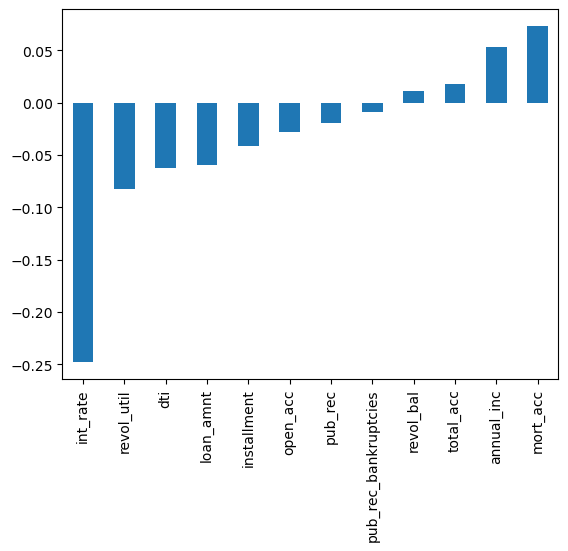

In [337]:
data.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind = 'bar')

## Section 2: Data Preprcocessing 

Aim to remove or fill any missing data. Change categorical data to dummy variables. Drop any unnecessary features

In [338]:
len(data)

396030

In [339]:
100 * data.isnull().sum() / len(data)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Now, we need to check 3 values**

1. emp_title
2. emp_length
3. mort_acc

## 2.1 emp_title

In [340]:
data['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [341]:
data['emp_title'].nunique()

173105

There are a lot of emp_titles to change into dummy variables. So dropping it

In [342]:
data = data.drop('emp_title', axis = 1)

In [343]:
data.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1


## 2.2 emp_length

In [344]:
# get all the categories in emp_length sorted

sorted(data['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [345]:
# store the order
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years',
 '8 years', '9 years', '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

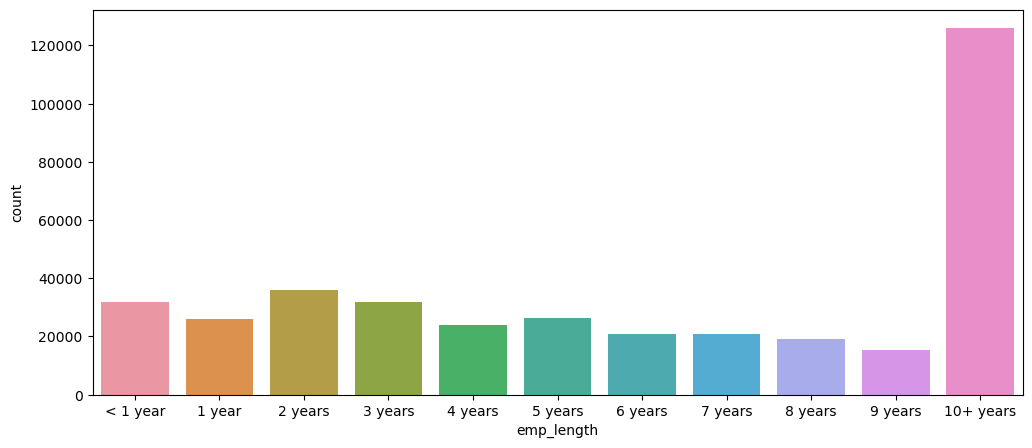

In [346]:
# resizing
plt.figure(figsize = (12,5))

# countplot
sns.countplot(x = 'emp_length', data = data, order = emp_length_order)

<AxesSubplot:xlabel='emp_length', ylabel='count'>

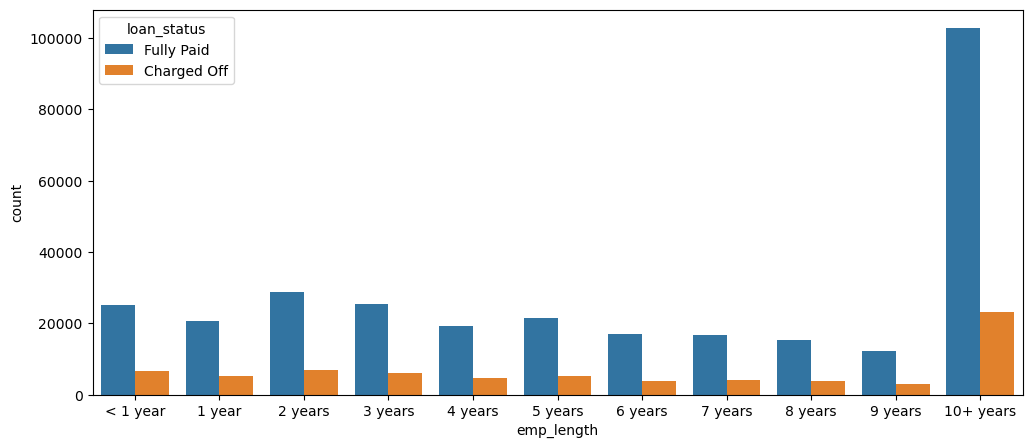

In [347]:
# separating the above plot with loan_repaid

# resizing
plt.figure(figsize = (12,5))

# countplot
sns.countplot(x = 'emp_length', data = data, order = emp_length_order, hue = 'loan_status')

Since the plots give no useful info regarding the relation between emp_length and being charged off, 
let us look at the percentages in each category that did not pay back their loan

In [348]:
# all Charged off loans grouped by emp_length

data_co = data [data['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']
data_co

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [349]:
# all Fully Paid loans grouped by emp_length

data_fp = data [data['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']
data_fp

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [350]:
# percentage calc

emp_p = data_co/data_fp
emp_p

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

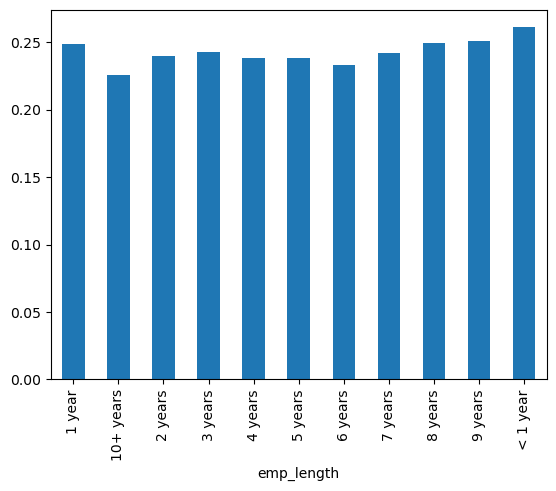

In [351]:
emp_p.plot(kind = 'bar')

Since the Charged Off rates are very similar across all categories, dropping it 

In [352]:
data = data.drop('emp_length', axis = 1)

In [353]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


## 2.3 mort_acc

In [354]:
col_info('mort_acc')

Number of mortgage accounts.


In [355]:
data['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [356]:
data.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**mort_acc and total_acc seem correlated. So, filling the mort_acc values based off of mort_acc values/avg of total_acc**

In [357]:
avg_total_acc = data.groupby('total_acc').mean()['mort_acc']
avg_total_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [358]:
# creating a function to fill the missing mort_acc values

def fill_mort_acc(total_acc, mort_acc):
    '''
    Takes total_acc and mort_acc
    if mort_acc is Nan, returns avg mort_acc value according to the total_acc value 
      
    '''
    
    if np.isnan(mort_acc):
        return avg_total_acc[total_acc]
    else:
        return mort_acc

In [359]:
# using .apply() to fill in missing mort_acc values

data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis = 1)

## 2.4 Reviewing and making changes

In [360]:
data.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                   1755
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util               276
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                   0
pub_rec_bankruptcies     535
address                    0
loan_repaid                0
dtype: int64

**revol_util and pub_rec_bankruptcies account for less than 0.5% of the data so dropping the null values**

In [361]:
# dropping the rows with null values

data = data.dropna()

In [362]:
# reviewing

data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

**the pupose and the title column seem to have similar contents**

In [363]:
# cheking the purpose column contents of 1st 10 rows
data['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [364]:
# cheking the title column contents of 1st 10 rows
data['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**Since the purpose column seems to have a description of the title column, dropping the title column**

In [365]:
data = data.drop('title', axis = 1)

In [366]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

## 2.5 Categorical Variables and Dummy Variables

**lets check all the non-numeric data columns**

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393465 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393465 non-null  float64
 1   term                  393465 non-null  object 
 2   int_rate              393465 non-null  float64
 3   installment           393465 non-null  float64
 4   grade                 393465 non-null  object 
 5   sub_grade             393465 non-null  object 
 6   home_ownership        393465 non-null  object 
 7   annual_inc            393465 non-null  float64
 8   verification_status   393465 non-null  object 
 9   issue_d               393465 non-null  object 
 10  loan_status           393465 non-null  object 
 11  purpose               393465 non-null  object 
 12  dti                   393465 non-null  float64
 13  earliest_cr_line      393465 non-null  object 
 14  open_acc              393465 non-null  float64
 15  

**Getting all columns with object entries**

In [368]:
data.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

**Going through them one by one and deciding what to do with them**

**1. term**

In [369]:
data['term'].value_counts()

 36 months    300024
 60 months     93441
Name: term, dtype: int64

In [370]:
# replacing all the term values with either integer 36 or 60 

data['term'] = data['term'].apply(lambda x: int(x[:3]))

In [371]:
data['term'].dtype

dtype('int64')

**2. grade**

In [372]:
# Since subgrade is also a part of grade, dropping grade column

data = data.drop('grade', axis = 1)

In [373]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

**3. subgrades**

In [374]:
# creating dummy variables for the subgrades

subgrade_dummies = pd.get_dummies(data['sub_grade'], drop_first = True)

In [375]:
# checking

subgrade_dummies.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [376]:
# add these to the OG data

data  = pd.concat([data.drop('sub_grade', axis = 1), subgrade_dummies], axis = 1)

In [377]:
# checking if it went through 
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

**4. home_ownership**

In [378]:
data['home_ownership'].value_counts()

MORTGAGE    197110
RENT        158770
OWN          37443
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [379]:
# replacing NONE and ANY with OTHER so that we are left with 4 categories

data['home_ownership'] = data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [380]:
# converting the values into dummies 
dummies = pd.get_dummies(data['home_ownership'], drop_first = True)

# adding these to the OG df
data = pd.concat([data, dummies], axis = 1)

# dropping the zipcode column
data = data.drop('home_ownership', axis = 1)

**5. verification_status**  (check 12.)

In [381]:
data['verification_status'].value_counts()

Verified           138867
Source Verified    130571
Not Verified       124027
Name: verification_status, dtype: int64

**6. issue_d**

In [382]:
col_info('issue_d')

The month which the loan was funded


In [383]:
# dropping it 
data = data.drop('issue_d', axis = 1)

**7. purpose** (check 12.)

In [384]:
data['purpose'].value_counts()

debt_consolidation    233108
credit_card            82577
home_improvement       23836
other                  20976
major_purchase          8713
small_business          5627
car                     4656
medical                 4152
moving                  2835
vacation                2431
house                   2190
wedding                 1794
renewable_energy         326
educational              244
Name: purpose, dtype: int64

**8. earliest_cr_line**

In [385]:
data['earliest_cr_line'].value_counts()

Oct-2000    2999
Aug-2000    2911
Oct-2001    2878
Aug-2001    2869
Nov-2000    2723
            ... 
Apr-1960       1
Jul-1958       1
Nov-1957       1
Jul-1955       1
Aug-1959       1
Name: earliest_cr_line, Length: 683, dtype: int64

In [386]:
# it would be easier just keeping the year from cr_line
# so, extracting the year and converting into int

data['earliest_cr_yr'] = data['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [387]:
data = data.drop('earliest_cr_line', axis = 1)

**9. initial_list_status** (check 12.)

In [388]:
data['initial_list_status'].value_counts()

f    236947
w    156518
Name: initial_list_status, dtype: int64

**10. application_type** (check 12.)

In [389]:
data['application_type'].value_counts()

INDIVIDUAL    392844
JOINT            356
DIRECT_PAY       265
Name: application_type, dtype: int64

**11. address**

In [390]:
data['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 393465, dtype: object

In [391]:
# creating a zipcode column by extracting zipcode from the addresses

data['zip_code'] = data['address'].apply(lambda x: x[-5:])

In [392]:
# dropping the address column

data = data.drop('address', axis = 1)

In [393]:
# checking value_counts() for tehe zipcode column

data['zip_code'].value_counts()

70466    56629
22690    56157
30723    56129
48052    55560
00813    45512
29597    45200
05113    45120
11650    11149
93700    11088
86630    10921
Name: zip_code, dtype: int64

In [394]:
# converting the values into dummies 
dummies = pd.get_dummies(data['zip_code'], drop_first = True)

# adding these to the OG df
data = pd.concat([data, dummies], axis = 1)

# dropping the zipcode column
data = data.drop('zip_code', axis = 1)

**12. verification_status, purpose, initial_list_status, application_type -> dummies**

In [395]:
# converting the values into dummies
dummies = pd.get_dummies(data[['verification_status', 'purpose', 'initial_list_status', 'application_type']], drop_first = True)

# adding these to the OG df
data = pd.concat([data, dummies], axis = 1)

# dropping the OG columns
data = data.drop(['verification_status', 'purpose', 'initial_list_status', 'application_type'], axis = 1)

In [396]:
data

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,0,0,0,1,0,1,1,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,6.0,0.0,1990.0,...,0,0,0,0,0,0,0,1,1,0
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,6.0,0.0,43263.0,...,0,0,0,0,0,0,0,0,1,0
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,15.0,0.0,32704.0,...,0,0,0,0,0,0,0,0,1,0
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,9.0,0.0,15704.0,...,0,0,0,0,0,0,0,0,1,0


**Lets check if all columns have been converted to numeric values!**

In [397]:
data.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

In [398]:
# since we already converted loan_status to numeric values in loan_repaid, dropping the column
data = data.drop('loan_status', axis = 1)

## Section 3: Training 

**Defining x and y**

In [399]:
X = data.drop('loan_repaid', axis = 1).values

y = data['loan_repaid'].values

**Train-Test Split**

In [400]:
# import 
from sklearn.model_selection import train_test_split

# making the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

**Normalising the data**

In [401]:
# import 
from sklearn.preprocessing import MinMaxScaler

# creating an instance of the scaler
scaler = MinMaxScaler()

# using .fit_transform() on the train data 
X_train = scaler.fit_transform(X_train)

# using only fit for the test data for no leaks
X_test = scaler.transform(X_test)

**Imports for the model**

In [402]:
# tensorflow
import tensorflow as tf

# model
from tensorflow.keras.models import Sequential

# layers
from tensorflow.keras.layers import Dense, Activation,Dropout

# 
from tensorflow.keras.constraints import max_norm

**Creating the model**

In [403]:
model = Sequential()

# input layer
model.add(Dense(78, activation ='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation ='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation ='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units = 1, activation ='sigmoid'))

# compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

**Fit the model**

In [404]:
model.fit(x = X_train, 
          y = y_train, 
          epochs = 25,
          batch_size = 256,
          validation_data = (X_test, y_test), 
          )

Epoch 1/25
1230/1230 [==============================] - 3s 2ms/step - loss: 0.3010 - val_loss: 0.2623
Epoch 2/25
1230/1230 [==============================] - 2s 2ms/step - loss: 0.2660 - val_loss: 0.2605
Epoch 3/25
1230/1230 [==============================] - 2s 2ms/step - loss: 0.2637 - val_loss: 0.2604
Epoch 4/25
1230/1230 [==============================] - 2s 2ms/step - loss: 0.2622 - val_loss: 0.2597
Epoch 5/25
1230/1230 [==============================] - 2s 2ms/step - loss: 0.2616 - val_loss: 0.2597
Epoch 6/25
1230/1230 [==============================] - 2s 2ms/step - loss: 0.2610 - val_loss: 0.2600
Epoch 7/25
1230/1230 [==============================] - 2s 2ms/step - loss: 0.2601 - val_loss: 0.2597
Epoch 8/25
1230/1230 [==============================] - 2s 2ms/step - loss: 0.2601 - val_loss: 0.2593
Epoch 9/25
1230/1230 [==============================] - 2s 2ms/step - loss: 0.2596 - val_loss: 0.2594
Epoch 10/25
1230/1230 [==============================] - 2s 2ms/step - loss: 0.259

In [408]:
# storing losses and validation loss in a pd df
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 1200x800 with 0 Axes>

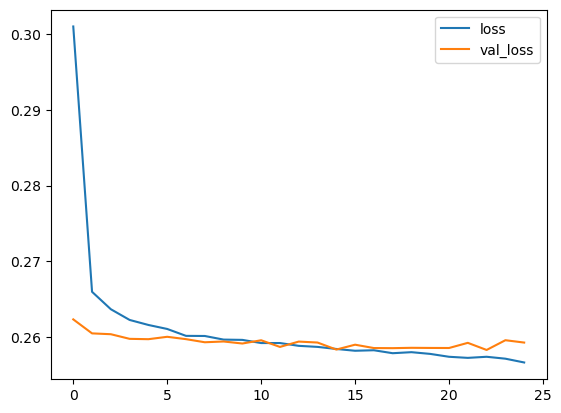

In [429]:
plt.figure(figsize = (12,8))

# plotting loss and validation loss over time
losses[['loss','val_loss']].plot()

## Section 4: Predictions and Evaluations

**Storing the predictions**

In [417]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

2460/2460 [==============================] - 1s 529us/step


**Evaluations**

In [419]:
# imports
from sklearn.metrics import classification_report, confusion_matrix

# confusion matrix
print(confusion_matrix(y_test, predictions))

print('\n')

# classification report
print(classification_report(y_test, predictions))

[[ 6840  8635]
 [  126 63092]]


              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15475
           1       0.88      1.00      0.94     63218

    accuracy                           0.89     78693
   macro avg       0.93      0.72      0.77     78693
weighted avg       0.90      0.89      0.87     78693



**Predicting on a new entry**

In [421]:
# generating a new entry
import random
random.seed(101)
random_ind = random.randint(0,len(data))

# getting the independent variables
new_customer = data.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                      16000.00
term                              60.00
int_rate                          12.12
installment                      356.89
annual_inc                     40000.00
                                 ...   
purpose_vacation                   0.00
purpose_wedding                    0.00
initial_list_status_w              0.00
application_type_INDIVIDUAL        1.00
application_type_JOINT             0.00
Name: 306669, Length: 78, dtype: float64

In [425]:
# predicting on new customer 
(model.predict(new_customer.values.reshape(1,78)) > 0.5).astype("int32")

1/1 [==============================] - 0s 15ms/step


array([[1]])

In [427]:
# verifying the prediction
data.iloc[random_ind]['loan_repaid']

1.0

## Prediction == Correct!